In [132]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [135]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [136]:
df.shape

(506, 14)

In [137]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [138]:
df.dropna(inplace=True)

In [139]:
df.duplicated().sum()

np.int64(0)

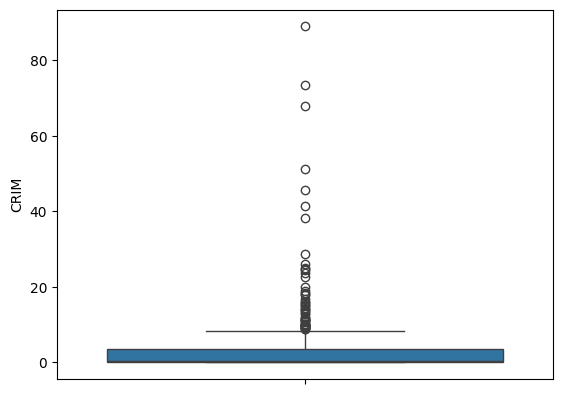

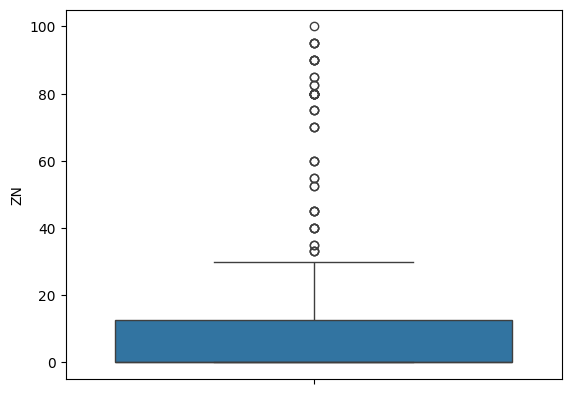

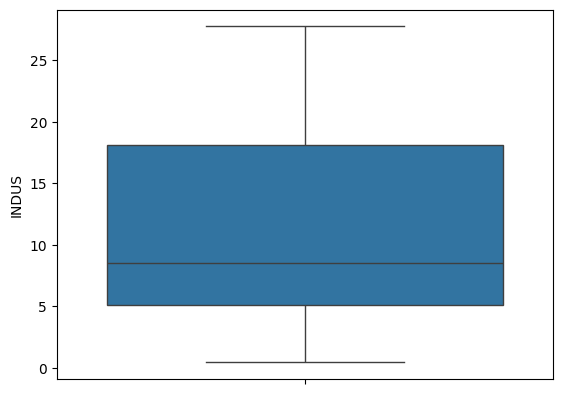

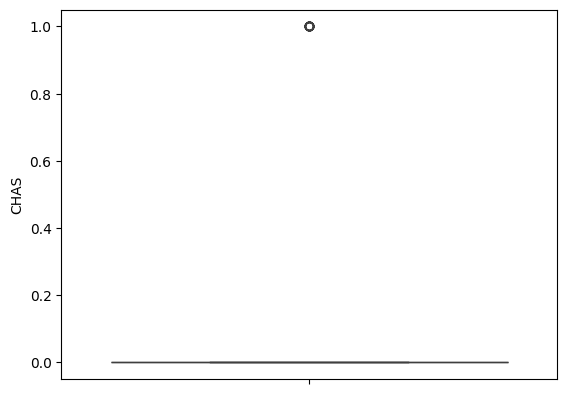

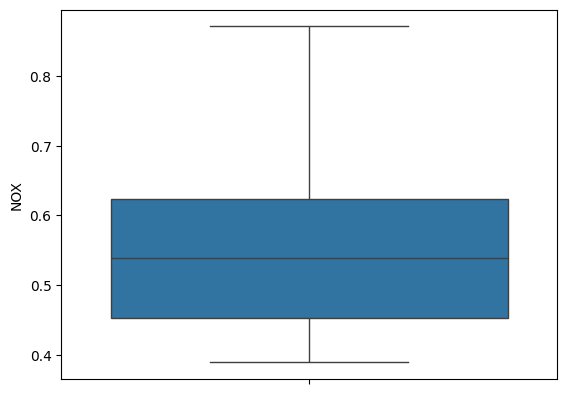

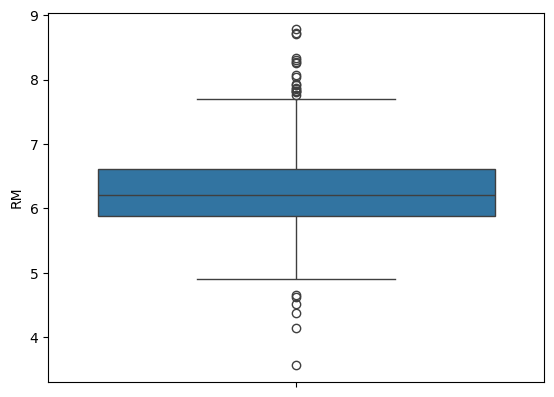

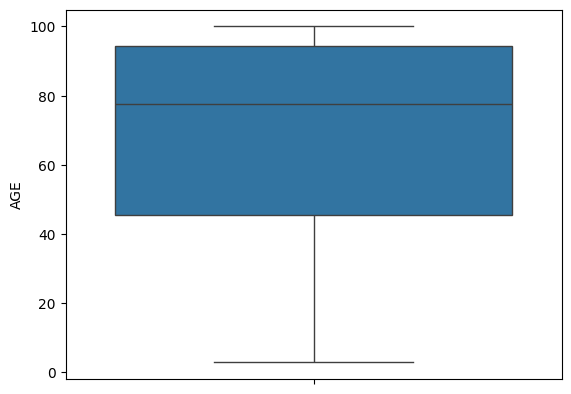

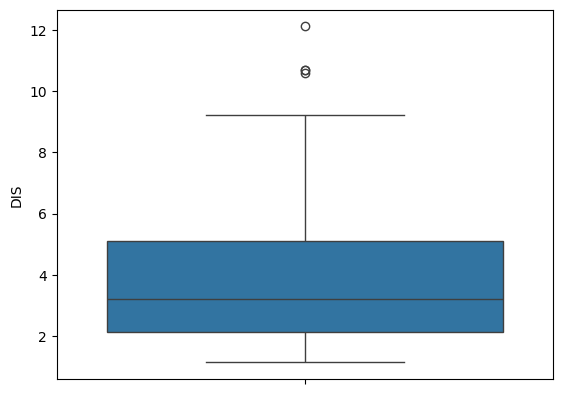

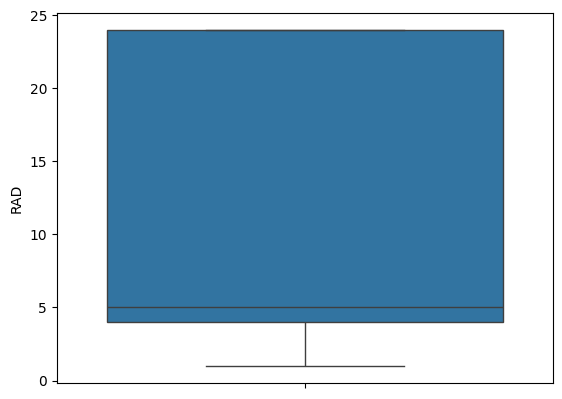

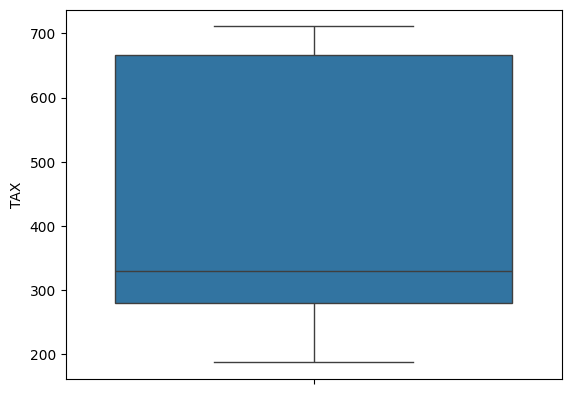

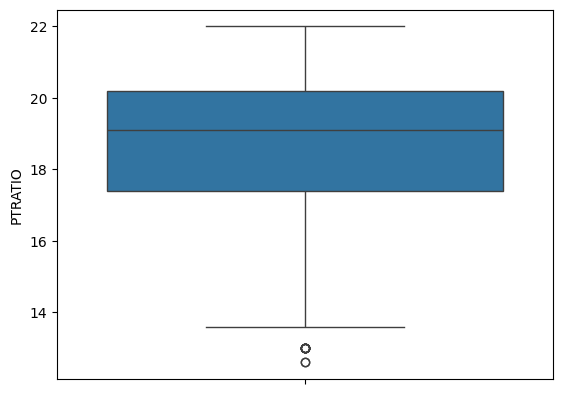

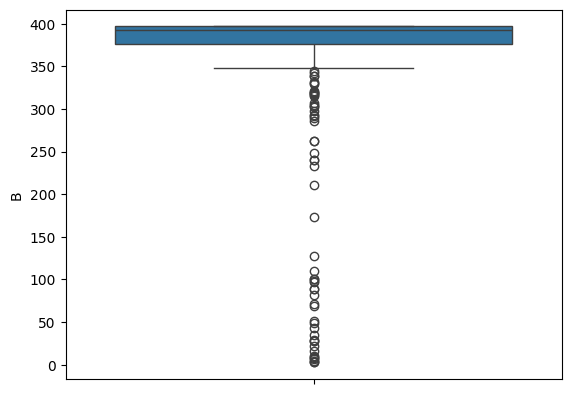

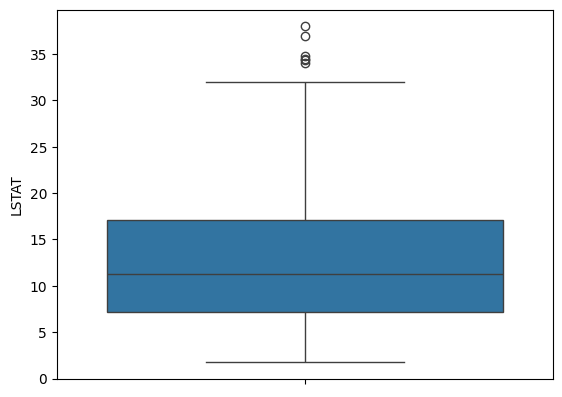

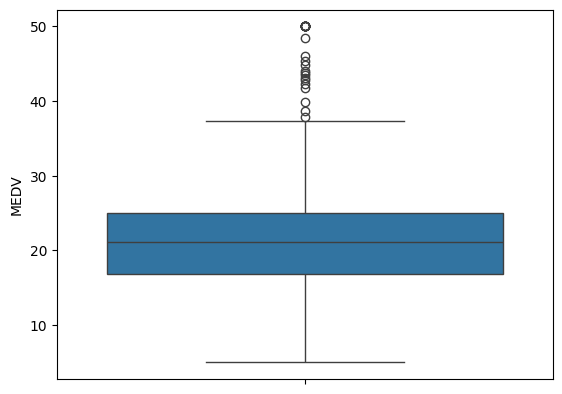

In [140]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

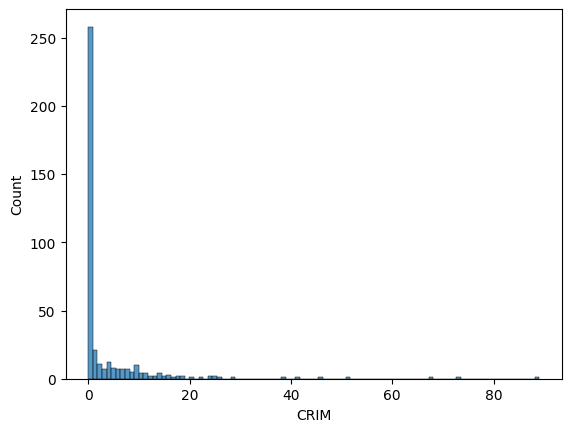

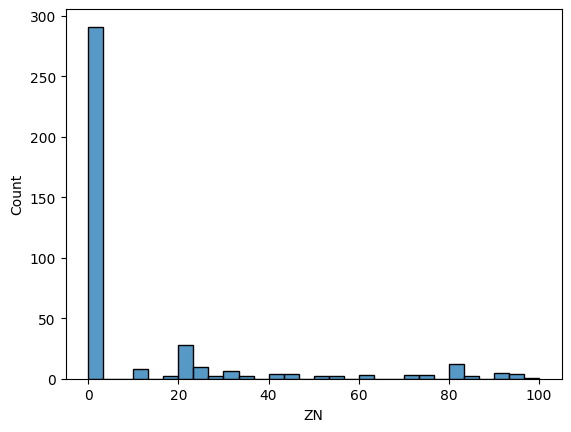

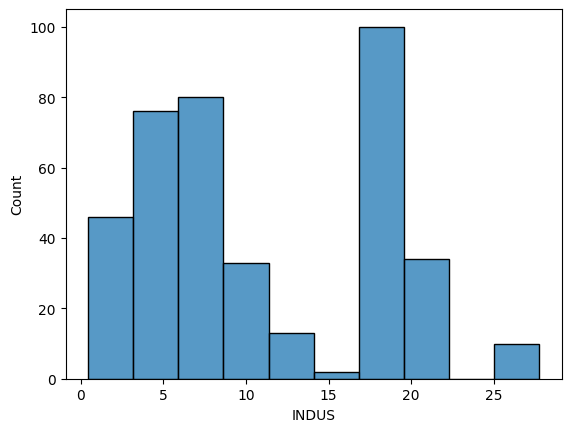

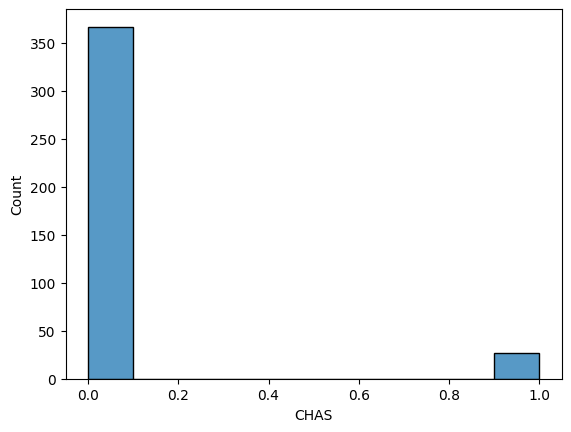

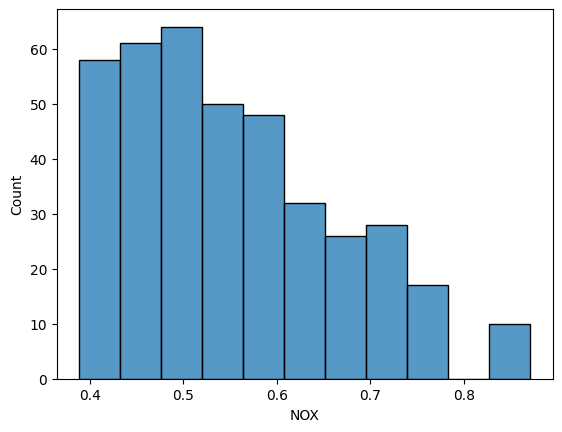

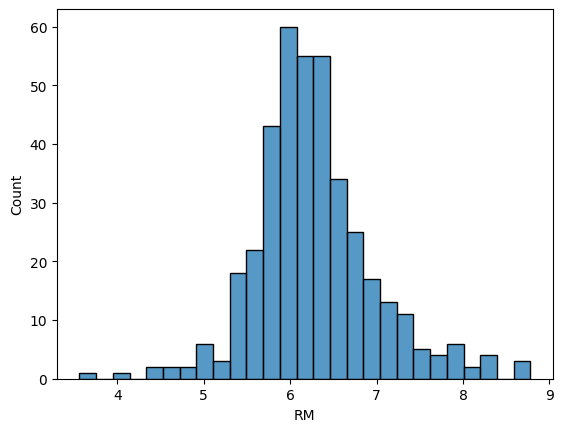

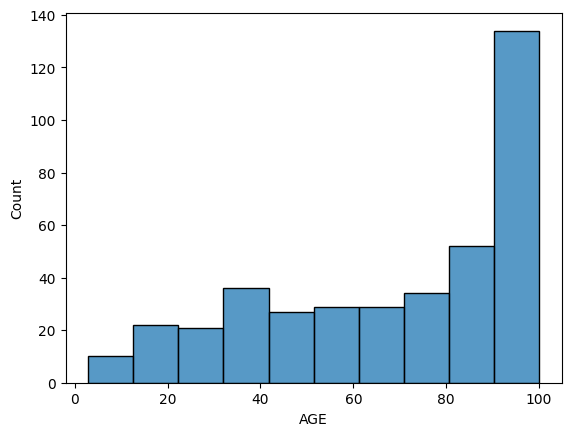

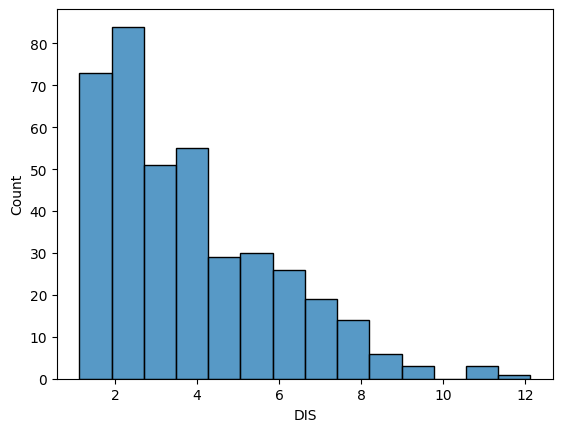

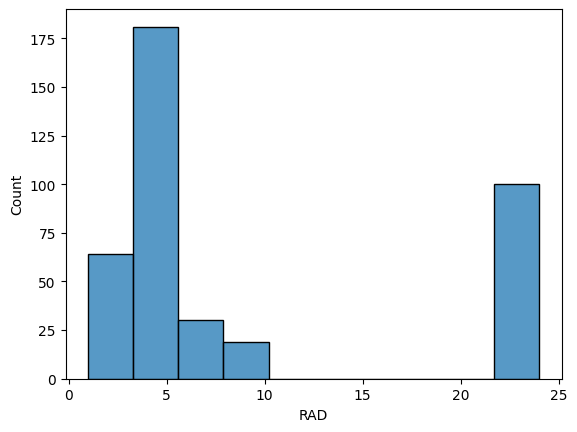

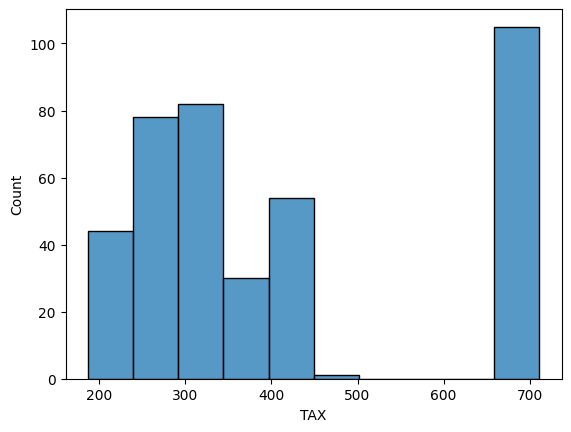

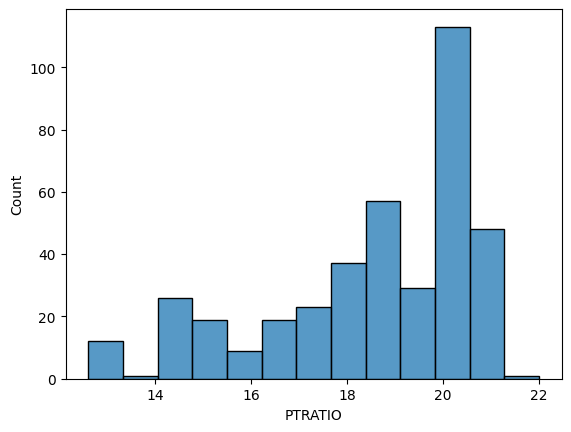

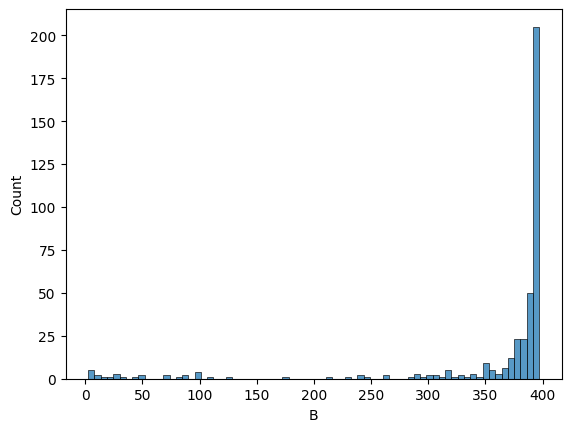

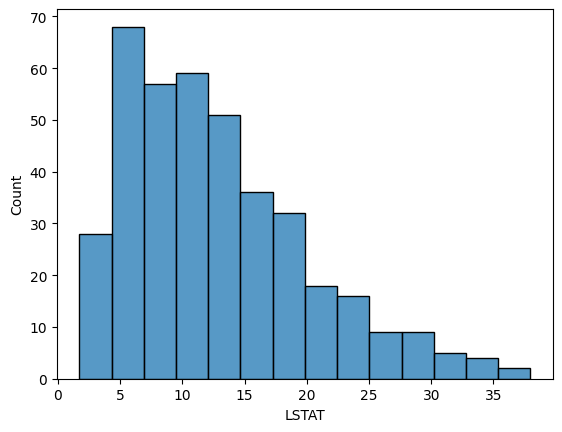

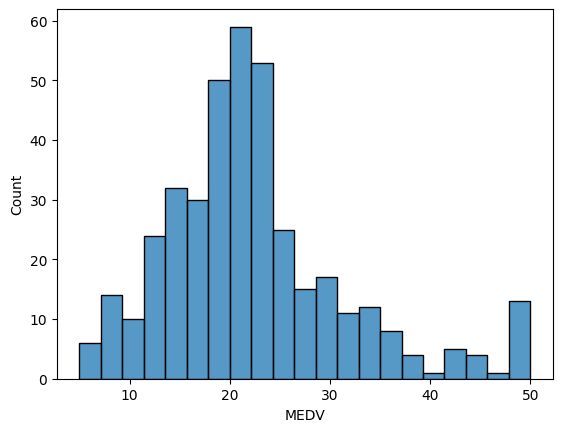

In [141]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

In [142]:
dummy_subject = df[['AGE','NOX','CRIM','B','DIS','RM','LSTAT']]
biner_subject = df[['INDUS', 'ZN']]

for col in dummy_subject:
    df[f'{col}_d'] = df[col].apply(lambda x: 1 if x > df[col].mean() else 0) # high = 1 low = 0

for col in biner_subject:
    df[f'{col}_d'] = df[col].apply(lambda x: 0 if x < 1 else 1) # yes = 1 no = 0
    
df['MEDV'] = df['MEDV'].apply(lambda x: 1 if x > 25 else 0) # 1 = high 0 = low
    
    
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,MEDV,AGE_d,NOX_d,CRIM_d,B_d,DIS_d,RM_d,LSTAT_d,INDUS_d,ZN_d
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,...,0,0,0,0,1,1,1,0,1,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,...,0,1,0,0,1,1,1,0,1,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,...,1,0,0,0,1,1,1,0,1,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,...,1,0,0,0,1,1,1,0,1,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,...,1,0,0,0,1,1,1,0,1,0


In [143]:
x_cat = df[['MEDV','AGE_d','DIS_d','ZN_d','NOX_d','CRIM_d','B_d','INDUS_d','CHAS']]
x_num = df.drop(columns=['AGE_d','DIS_d','ZN_d','NOX_d','CRIM_d','B_d','INDUS_d','CHAS'])

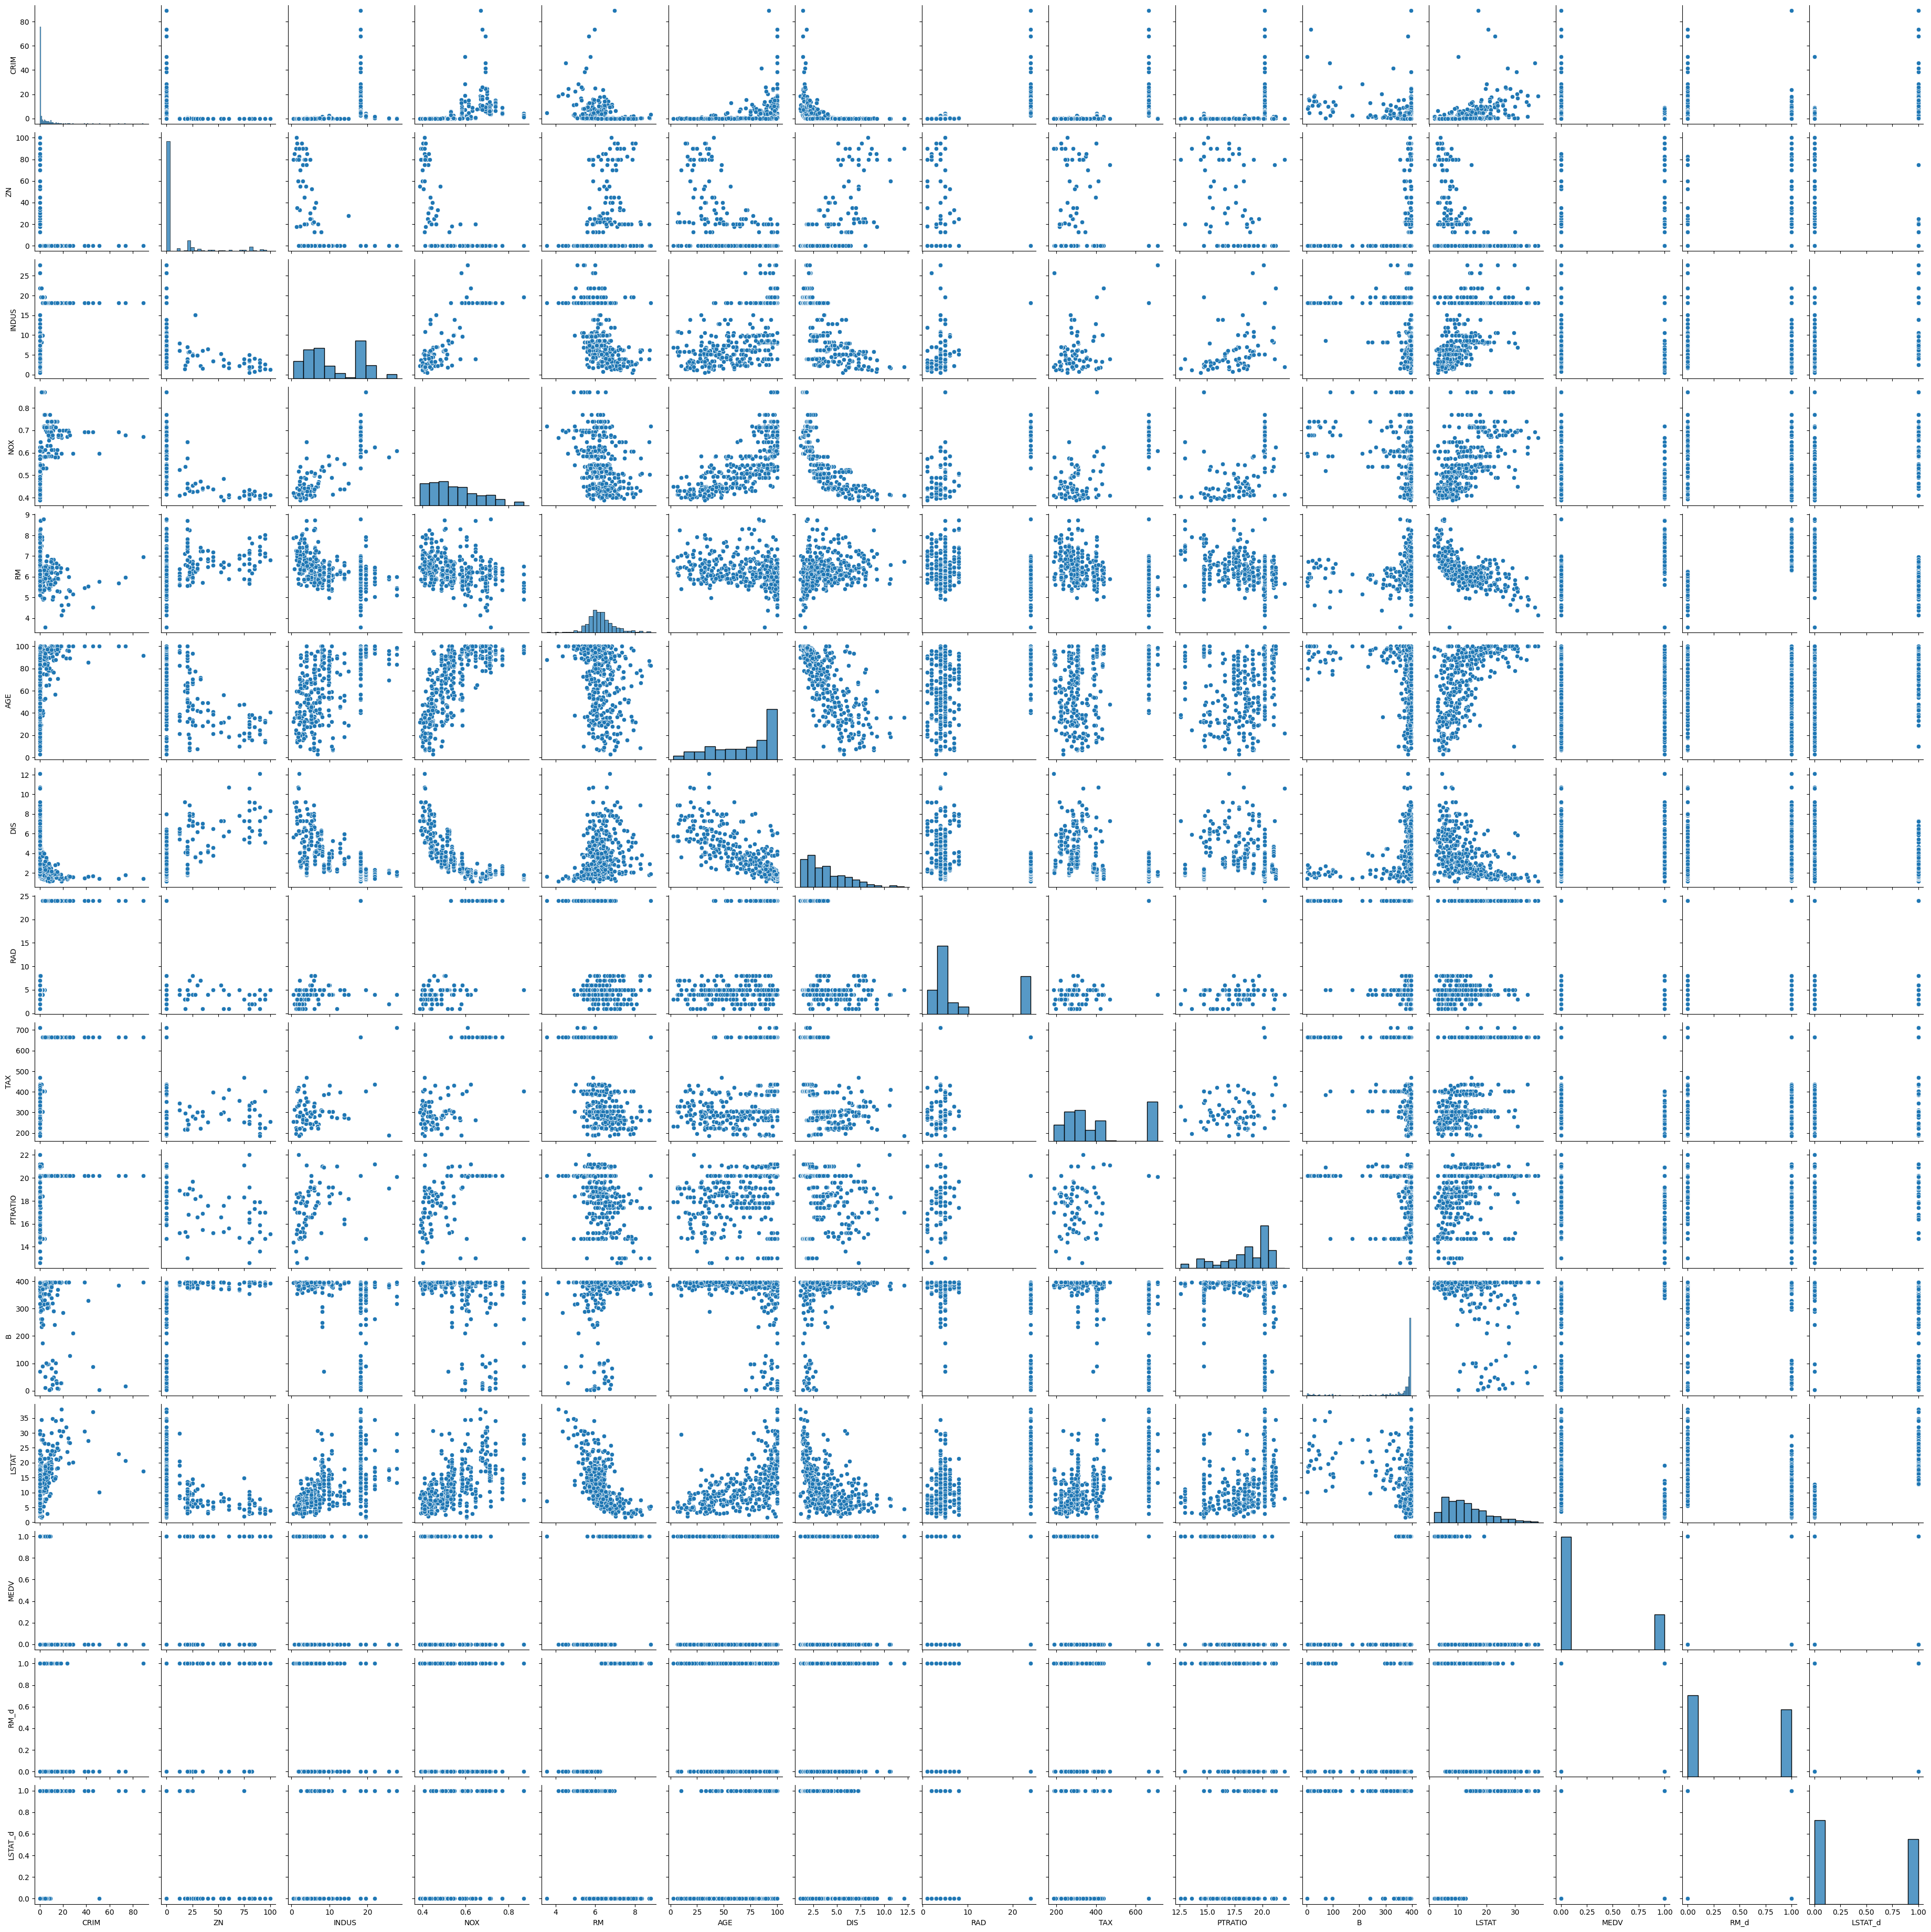

In [144]:
sns.pairplot(x_num)
plt.show()

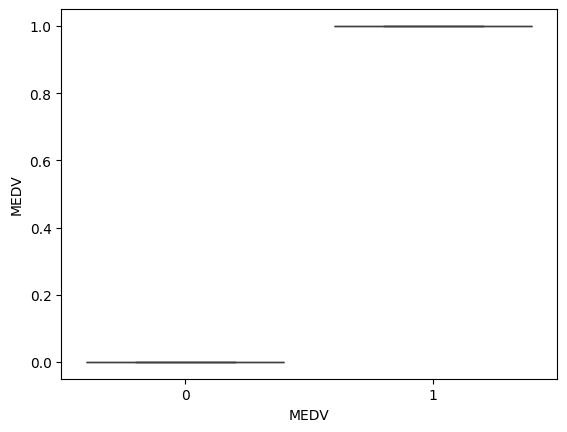

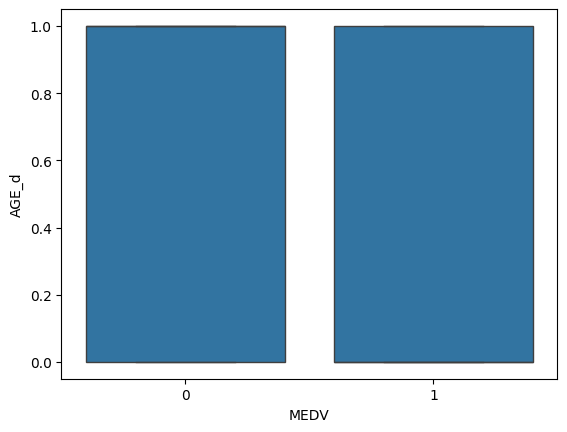

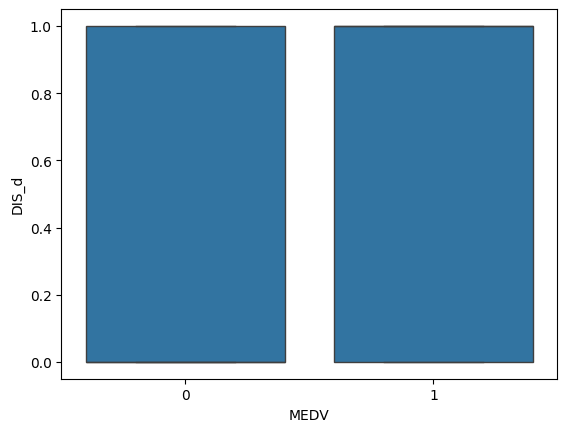

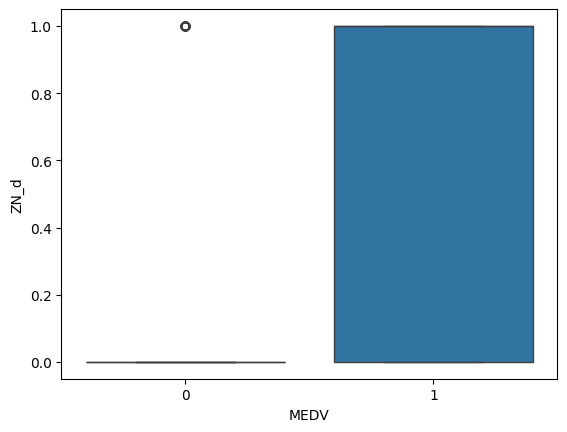

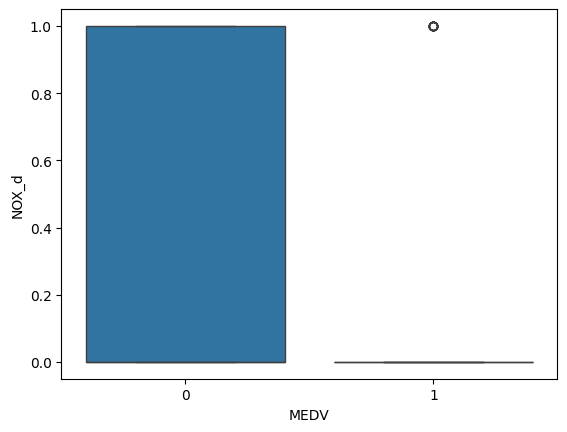

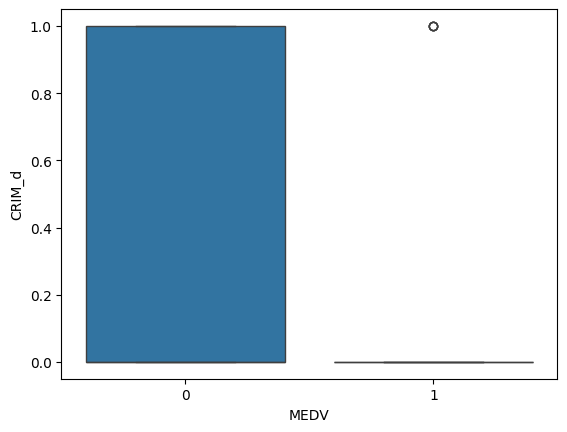

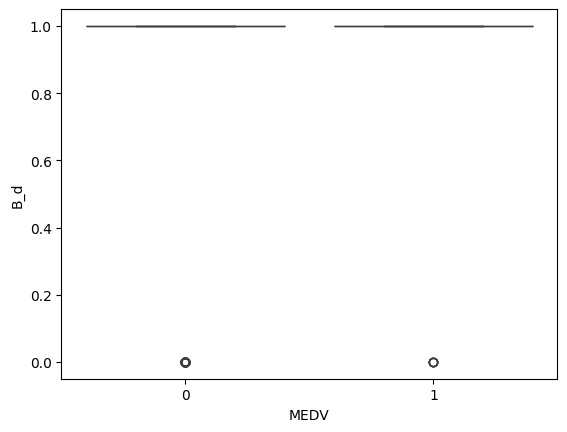

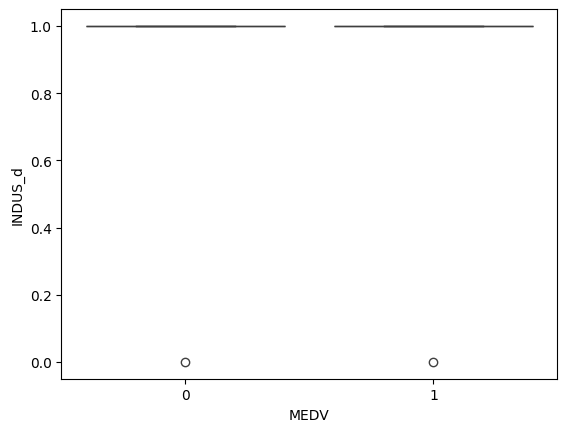

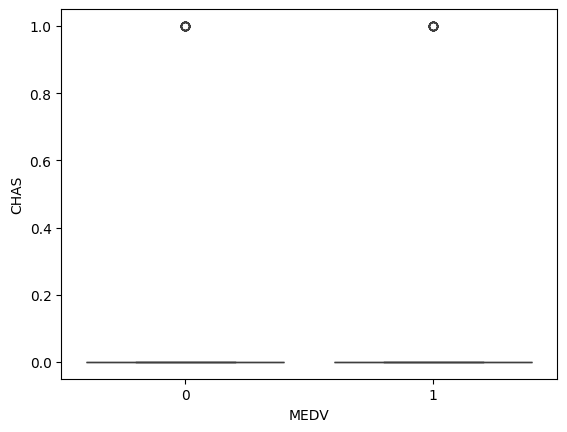

In [145]:
for col in x_cat.columns:
    sns.boxplot(x=x_cat['MEDV'], y=df[col])
    plt.show()

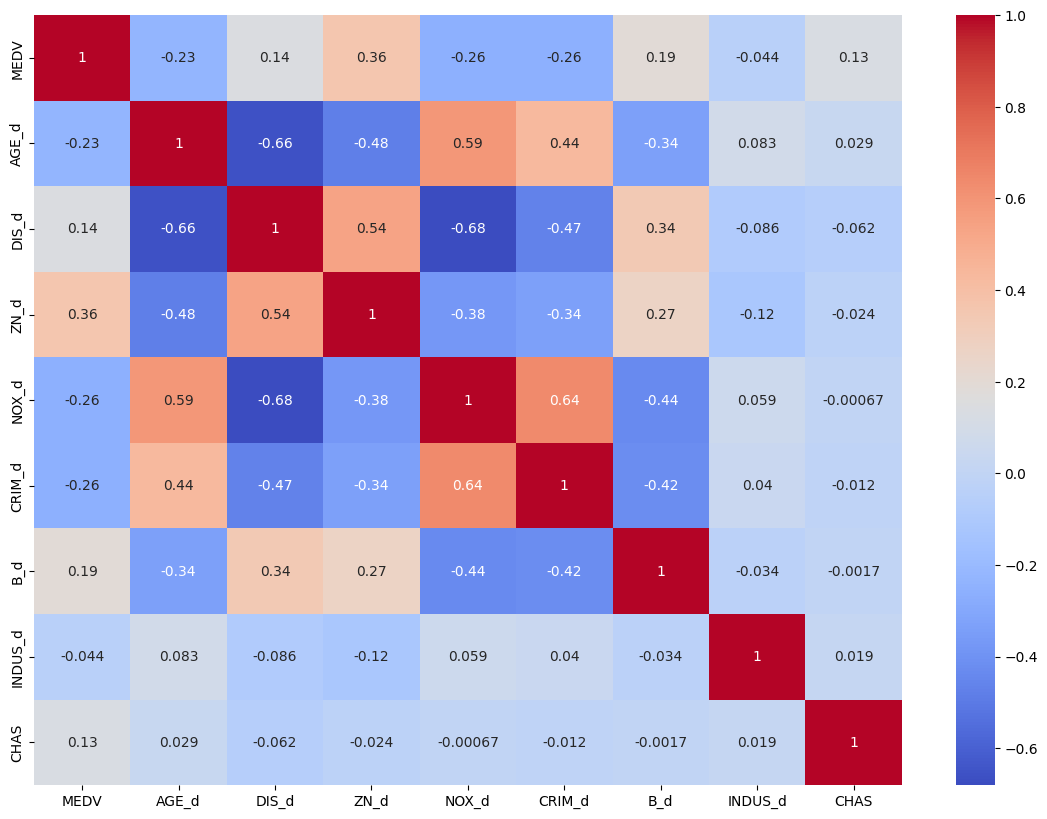

In [146]:
plt.figure(figsize=(14,10))
sns.heatmap(x_cat.corr(),annot=True,cmap='coolwarm')
plt.show()

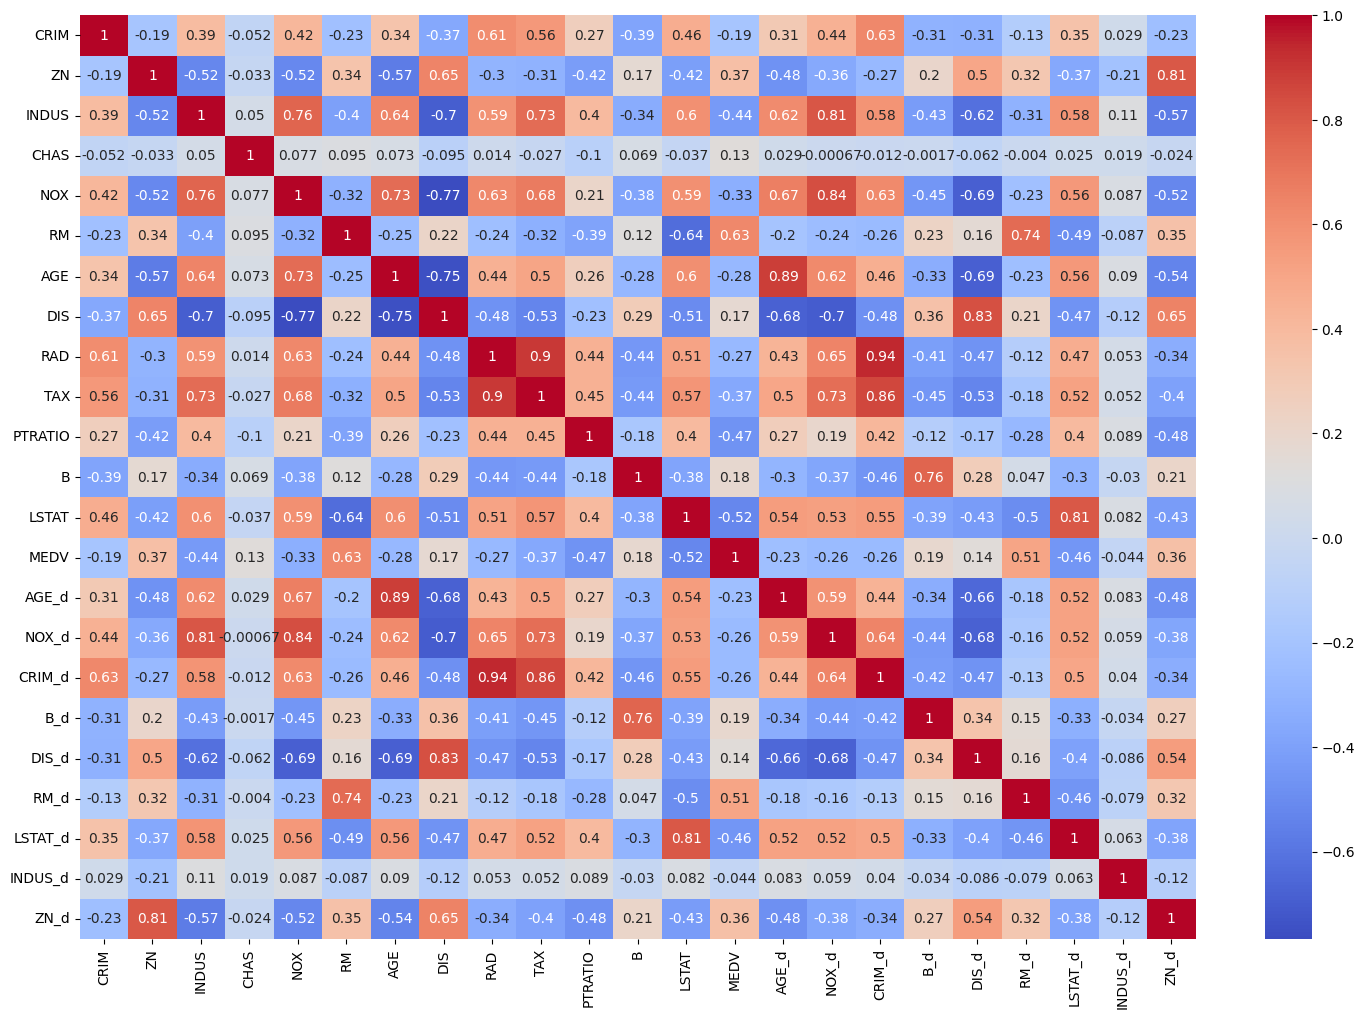

In [147]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [148]:
df.drop(columns=['INDUS_d','CHAS','RAD'],inplace=True)

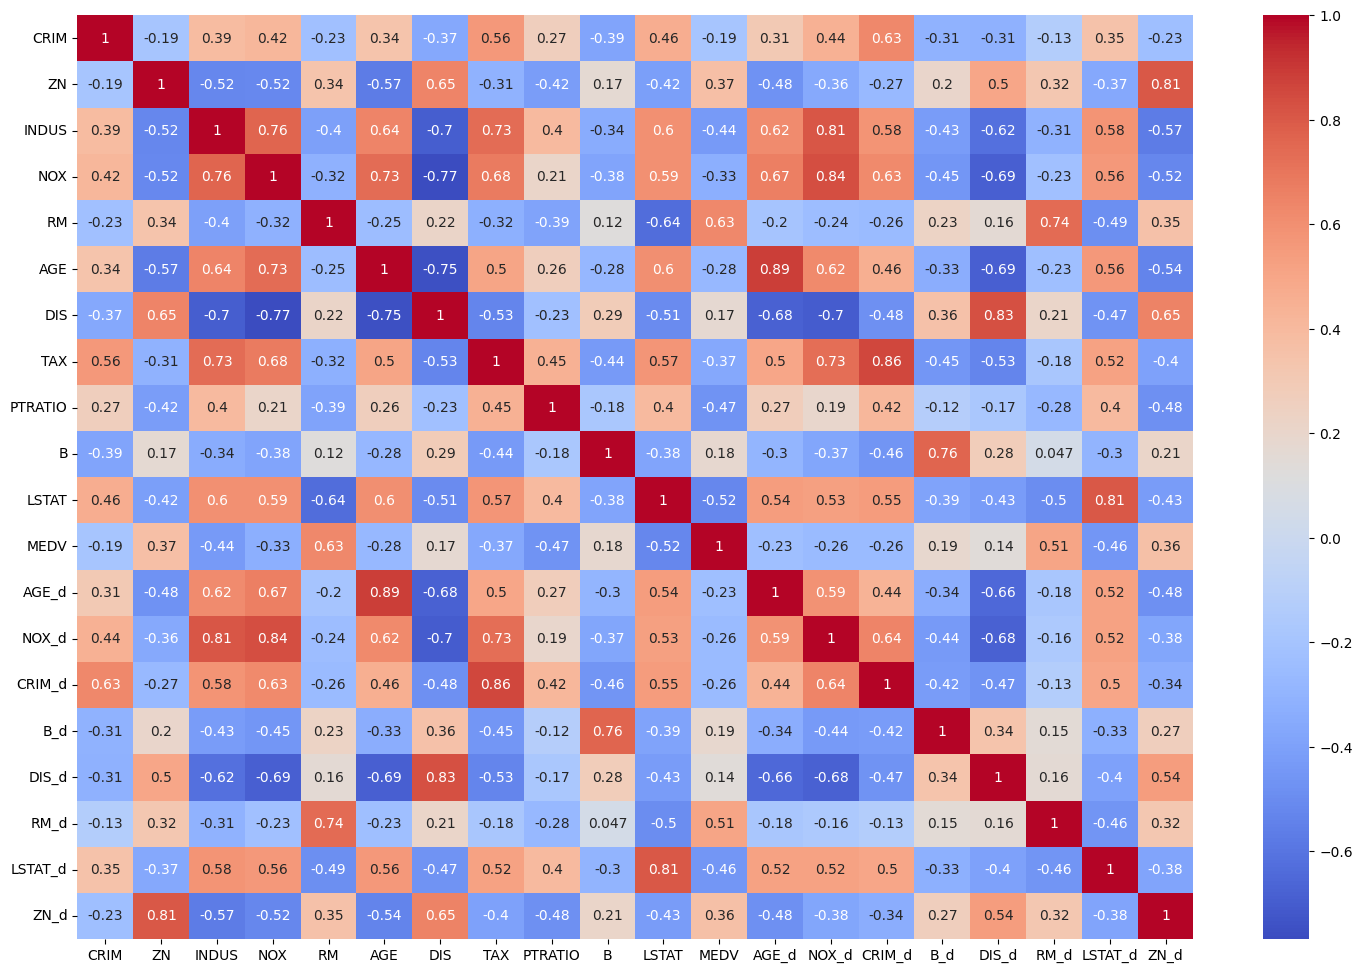

In [149]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [150]:
df.drop(columns=['B','B_d','DIS','DIS_d','AGE'],inplace=True)

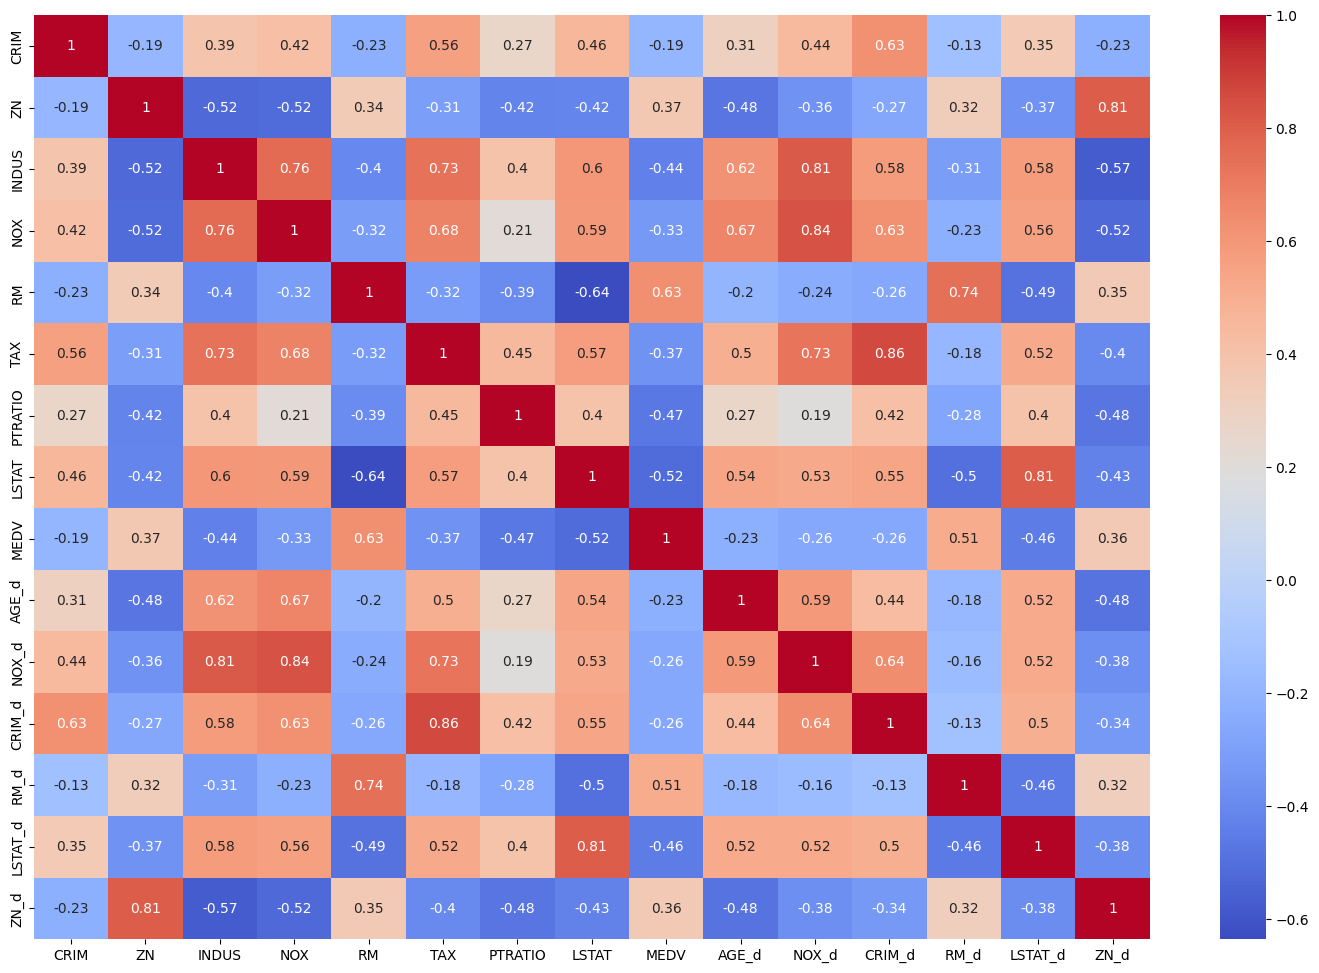

In [151]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [152]:
df['MEDV'].value_counts()

MEDV
0    300
1     94
Name: count, dtype: int64

In [153]:
# major = df[df['MEDV'] == 0]
# minor = df[df['MEDV'] == 1]
# class_size = round(len(df['MEDV']) / 2)

# minor_scaled = minor.sample(class_size, replace=True, random_state=42)
# major_scaled = major.sample(class_size, replace=True, random_state=42)

# dfs = pd.concat([minor_scaled, major_scaled])
# df = dfs.sample(frac=1, random_state=42).reset_index(drop=True)

In [154]:
df.duplicated().sum()

np.int64(0)

In [155]:
len(df['MEDV'])

394

In [156]:
df['MEDV'].value_counts()

MEDV
0    300
1     94
Name: count, dtype: int64

In [157]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV,AGE_d,NOX_d,CRIM_d,RM_d,LSTAT_d,ZN_d
0,0.00632,18.0,2.31,0.538,6.575,296,15.3,4.98,0,0,0,0,1,0,1
1,0.02731,0.0,7.07,0.469,6.421,242,17.8,9.14,0,1,0,0,1,0,0
2,0.02729,0.0,7.07,0.469,7.185,242,17.8,4.03,1,0,0,0,1,0,0
3,0.03237,0.0,2.18,0.458,6.998,222,18.7,2.94,1,0,0,0,1,0,0
5,0.02985,0.0,2.18,0.458,6.430,222,18.7,5.21,1,0,0,0,1,0,0


In [158]:
x = df.drop(columns='MEDV')
y = df['MEDV']

In [159]:
def strat(x,y,train_size=0.8):
    np.random.seed(42)
    yidx = {}
    for i,label in enumerate(y):
        if label not in yidx:
            yidx[label] = [i]
        else:
            yidx[label].append(i)
            
    trbox = []
    tebox = []
    
    for i,label in yidx.items():
        shuffle = np.random.permutation(label)
        train = max(1,int(len(shuffle) * train_size))
        trbox.extend(shuffle[:train])
        tebox.extend(shuffle[train:])
        
    xtr = x.iloc[trbox].reset_index(drop=True)
    xte = x.iloc[tebox].reset_index(drop=True)
    ytr = y.iloc[trbox].reset_index(drop=True)
    yte = y.iloc[tebox].reset_index(drop=True)
    
    print(ytr.value_counts())
    print(yte.value_counts())
    
    return xtr,xte,ytr,yte

In [160]:
xtr,xte,ytr,yte = strat(x,y,train_size=0.8)

print(xtr.shape)
print(xte.shape)
print(ytr.shape)
print(yte.shape)

MEDV
0    240
1     75
Name: count, dtype: int64
MEDV
0    60
1    19
Name: count, dtype: int64
(315, 14)
(79, 14)
(315,)
(79,)


In [161]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

xtr_bal, ytr_bal = smote.fit_resample(xtr,ytr)

In [162]:
def minmax(input):
    minim = input.min()
    maxim = input.max()
    norm = (input - minim) / (maxim - minim)
    return norm,minim,maxim

In [163]:
xtrs,minim,maxim = minmax(xtr_bal)
xtes = (xte - minim) / (maxim - minim)

In [164]:
xtes.shape

(79, 14)

In [165]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(xtrs,ytr_bal)
ypred_svm = svm.predict(xtes)

In [166]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,n_estimators=100)
rf.fit(xtrs,ytr_bal)
ypred_rf = rf.predict(xtes)

In [167]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(yte,ypred_svm))
print(classification_report(yte,ypred_svm))
print(np.mean(yte == ypred_svm) * 100)

[[48 12]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        60
           1       0.54      0.74      0.62        19

    accuracy                           0.78        79
   macro avg       0.72      0.77      0.74        79
weighted avg       0.82      0.78      0.79        79

78.48101265822784


In [168]:
print(confusion_matrix(yte,ypred_rf))
print(classification_report(yte,ypred_rf))
print(np.mean(yte == ypred_rf) * 100)

[[56  4]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.76      0.68      0.72        19

    accuracy                           0.87        79
   macro avg       0.83      0.81      0.82        79
weighted avg       0.87      0.87      0.87        79

87.34177215189874


In [169]:
from sklearn.model_selection import  GridSearchCV

In [170]:
svm_params = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['rbf', 'linear'], # Try different kernels
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf'
}

svm = SVC(random_state=42)
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(xtrs, ytr_bal)

print("Best SVM Parameters:", svm_grid.best_params_)
print("Best SVM CV Accuracy:", svm_grid.best_score_)

Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM CV Accuracy: 0.9270833333333333


In [171]:
y_pred_svm = svm_grid.predict(xtes)
print("\nSVM Test Accuracy:", np.mean(yte == y_pred_svm) * 100)
print("SVM Classification Report:\n", classification_report(yte, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(yte, y_pred_svm))


SVM Test Accuracy: 87.34177215189874
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.76      0.68      0.72        19

    accuracy                           0.87        79
   macro avg       0.83      0.81      0.82        79
weighted avg       0.87      0.87      0.87        79

SVM Confusion Matrix:
 [[56  4]
 [ 6 13]]


In [172]:
rf_params = {
    'n_estimators': [100, 200],      # Number of trees
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]    # Minimum samples required to split a node
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
# Note: For Random Forest, scaling is not mandatory so we use the original features.
rf_grid.fit(xtrs, ytr_bal)

print("\nBest Random Forest Parameters:", rf_grid.best_params_)
print("Best RF CV Accuracy:", rf_grid.best_score_)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best RF CV Accuracy: 0.9645833333333332


In [173]:
y_pred_rf = rf_grid.predict(xtes)
print("\nRandom Forest Test Accuracy:", np.mean(yte == y_pred_rf) * 100)
print("Random Forest Classification Report:\n", classification_report(yte, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(yte, y_pred_rf))


Random Forest Test Accuracy: 87.34177215189874
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.76      0.68      0.72        19

    accuracy                           0.87        79
   macro avg       0.83      0.81      0.82        79
weighted avg       0.87      0.87      0.87        79

Random Forest Confusion Matrix:
 [[56  4]
 [ 6 13]]
